<a href="https://colab.research.google.com/github/Love1117/Machine_learning-Projects/blob/main/Machine_Learning%20Project/05_Advanced%20Project%20(AI)/AI%20Application%20(Vision%20%2B%20NLP)/AI%20Assistant(chat%20bot)/AI_Application_Chatbot_(NLP_%2B_vision)_using_Google_Gemma_3_27B_IT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

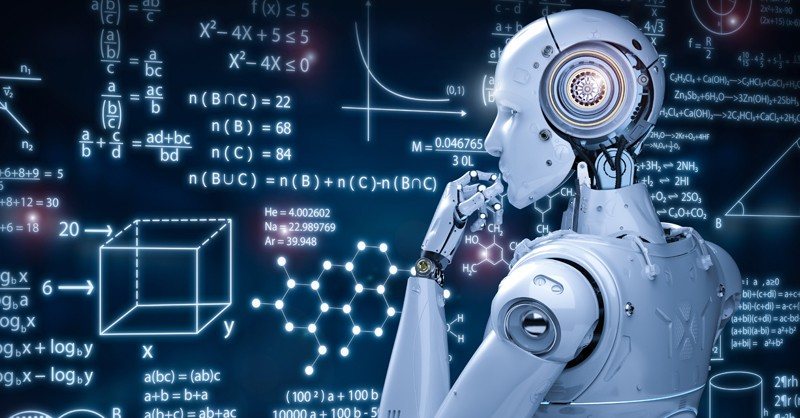
#**Project Summary: Multimodal AI Application (Vision + NLP) Using Google Gemma 3-27B-IT**

##**Overview:**
This project integrates Vision and Natural Language Processing within a single AI application powered by Google Gemma 3-27B-IT. The system functions as an intelligent assistant capable of interpreting images and generating high-quality text responses, enabling it to answer questions, describe visual content, and engage in natural, human-like conversation.
The result is a flexible multimodal AI tool that demonstrates advanced reasoning across both text and images.


---

#**Aim of the Project**
To build a unified multimodal assistant using Gemma 3-27B-IT for image understanding and text generation.

To showcase the model’s ability to analyze visual input, provide explanations, and handle conversational tasks.


In [ ]:
import os
from openai import OpenAI

import os
os.environ['HF_TOKEN'] = 'Love1117'

client = OpenAI(
      base_url="https://router.huggingface.co/v1",
                        api_key=os.environ["HF_TOKEN"],)

In [ ]:
import PIL.Image as image
import io
from google.colab import files
import base64


def chatbot():

  def encode_image(img):
    buf = io.BytesIO()
    img.save(buf, format="PNG")
    return base64.b64encode(buf.getvalue()).decode("utf-8")

  image_b64 = None # Initialize image_b64 here

      # ---- MENU ----
  print("Choose an option:")
  print("1 = Upload image/file")
  print("2 = Take a picture with camera")
  print("3 = Ask question without image")
  choice = input("Enter 1/2/3: ")

      # ---- OPTION 1: Upload ----
  if choice == "1":
    print("upload your image...")
    uploaded = files.upload()
    for fn in uploaded.keys():
      img = image.open(io.BytesIO(uploaded[fn]))
      image_b64 = encode_image(img)
      print("Image uploaded successfully!")


      # ---- OPTION 2: Take Picture ----
  elif choice == "2":
    from google.colab import output
    from IPython.display import display, Javascript

    result = {}

    def capture(data):
      result['img'] = data

    output.register_callback('capture_image', capture)

    display(Javascript('''
                      async function takePhoto() {
                      const video = document.createElement('video');
                      const stream = await navigator.mediaDevices.getUserMedia({video: true});
                      video.srcObject = stream;
                      await video.play();

                      const btn = document.createElement('button');
                      btn.textContent = 'Capture';
                      document.body.append(video, btn);

                      const done = await new Promise(resolve => btn.onclick = resolve);

                      const canvas = document.createElement('canvas');
                      canvas.width = video.videoWidth;
                      canvas.height = video.videoHeight;
                      canvas.getContext('2d').drawImage(video, 0, 0);

                      stream.getTracks().forEach(t => t.stop());
                      video.remove(); btn.remove();

                      const dataUrl = canvas.toDataURL('image/png');
                       google.colab.kernel.invokeFunction('capture_image', [dataUrl], {});}
                      takePhoto();'''))

    print("waiting for image...")

    import time
    while 'img' not in result:
      time.sleep(0.1)

    print("Image captured!")


    image_b64 = result['img'].split(",")[1]


      # ---- OPTION 3: No Image ----
  else:
    print("No image selected.")


      # ---- ASK QUESTION ----
  question = input("\nType your question: ")

          # ---- Build message for model ----
  content = [{"type": "text", "text": question}]

  if image_b64:
    content.append(
                {
                "type": "image_url",
                "image_url": {"url": f"data:image/png;base64,{image_b64}"}})

      # ---- Send to model ----
  completion = client.chat.completions.create(
            model="google/gemma-3-27b-it",
           messages=[{"role": "user", "content": content}])

  print("\nMODEL RESPONSE:\n")

  print(completion.choices[0].message.content)


##**Option 1:** Asking question with image

In [ ]:
chatbot()

Choose an option:
1 = Upload image/file
2 = Take a picture with camera
3 = Ask question without image
Enter 1/2/3: 1
upload your image...


Saving Screenshot_2025-12-05-01-58-27-03_40deb401b9ffe8e1df2f1cc5ba480b12.jpg to Screenshot_2025-12-05-01-58-27-03_40deb401b9ffe8e1df2f1cc5ba480b12 (1).jpg
Image uploaded successfully!

Type your question: what is wrong, why do my notebook refused to be saved in GitHub?

MODEL RESPONSE:

Okay, let's break down what's happening and how to fix it.  The screenshot shows GitHub has detected a secret in your notebook. Specifically, it's flagged a Hugging Face User Access Token.  This is *why* you are unable to save/push your notebook to GitHub.

**Here's the problem in detail:**

* **Secrets in Code are a Security Risk:** You've inadvertently included a confidential access token (the `Hugging Face User Access Token`) directly within your notebook file (`Project/Text_Generation_using_LLaMa_3_2.ipynb`).  This is a *very* bad practice. If that notebook is made public (even temporarily), anyone could potentially use that token to access your Hugging Face account, spend your credits, or potentia

##**Option 2:** Taking pictures with camera

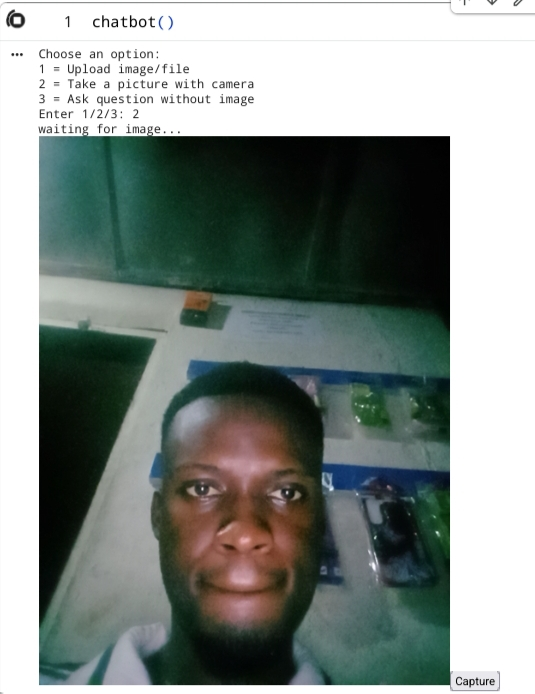

##**Option 3:** Asking question without image

In [ ]:
chatbot()

Choose an option:
1 = Upload image/file
2 = Take a picture with camera
3 = Ask question without image
Enter 1/2/3: 3
No image selected.

Type your question: what is your job?

MODEL RESPONSE:

I'm Gemma, a large language model created by the Gemma team at Google DeepMind. I'm an *open-weights* model, which means I'm widely available to the public. 

Basically, my job is to take text *and* images as input and generate text as output. I'm designed to be helpful and informative – I can try to answer your questions, explain things, and even get creative with different kinds of writing!

However, it's important to remember a few things:

*   **I don't have access to tools, real-time information, or Google Search.** My knowledge is based on the data I was trained on.
*   **I'm still under development.** I'm learning all the time, and sometimes I make mistakes.



You can find more information about me here: [https://ai.google.dev/gemma](https://ai.google.dev/gemma)


##**Conclusion / Deployment Summary**

When deployed, this system can:

• Explain images, detect objects, and offer contextual insight.

• Act as a smart conversational agent, answering questions, generating content, and supporting users interactively.

• Power real applications such as virtual assistants, educational tools, vision-enabled chatbots, and intelligent automation systems.


**Its combined Vision + NLP capability highlights strong proficiency in building modern, production-ready AI systems.**

